# Homework 4: Believer-Skeptic Model

In [8]:
from __future__ import division
import ADMCode
from ADMCode import visualize as vis

import numpy as np
from numpy.random import sample as rs
import pandas as pd
import sys
import os

# from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Temporary for now until push changes to PIP 
sys.path.insert(0,'../ADMCode')
import believer_skeptic

warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore")
sns.set(style='white', font_scale=1.3)

%matplotlib inline

## **Question 1:**  

**Answer the following questions about the relationship between the system of equations below.** See the Lab 4 notebook for definition of terms. 


* **Eq. 1**: Go process. $$G_{j,t}(\tau) = G_{j,t}(\tau - \Delta \tau) + \upsilon ^G _{j,t} \Delta \tau + \epsilon^G_j (\tau)$$

* **Eq. 2**: No go process. $$N_{j,t}(\tau) = N_{j,t}(\tau - \Delta \tau) + \upsilon ^N _{j,t} \Delta \tau + \epsilon^N_j (\tau)$$

* **Eq. 3**: Execution process. $$\theta_{j,t}(\tau) = [G_{j,t}(\tau) - N_{j,t}(\tau)] \cdot cosh(\gamma \cdot \tau)$$




**1a:** Describe the three components of Eqs. 1 & 2 in laymen's terms.

* **Answer 1a:** 



**1b:** As time ($\tau$) progresses, how does the exponential term in Eq. 3 ($\cosh (\gamma \cdot \tau)$) influence the nature of the competition between channels?

* **Answer 1b:** 



## **Question 2:**  

**Answer the following questions about the relationship between the system of equations below.**

* **Eq. 4**: Action value. $$q_j(t+1) = q_j(t) + \alpha \cdot [r(t) - q_j(t)]$$

* **Eq. 5**: Greediness. $$p_j(t) = \frac{\exp{\beta \cdot q_j(t)}}{\Sigma^n_i \exp{\beta \cdot q_i(t)}}$$

* **Eq. 6**: (Reward) prediction error. $$\delta_j(t) = p_j(t) - p_j(t-1)$$

* **Eq. 7**: Update rule: $$\upsilon^{G/N}_{j,t+1} = \upsilon^{G/N}_{j,t} + \alpha^{G/N} \cdot \delta_j(t)$$

**2a:** How is the estimation of the prediction error (Eq. 6) different than the normative form of the update rule in q-learning?
* **Answer 2a:** 

**2b:** In the Believer-Skeptic model, the Go & NoGo processes have different learning rates (i.e., $\alpha^G$ & $\alpha^N$). What biological justification is there for these two pathways having different forms of learning?
* **Answer 2b:** 



## ** Question 3: **

In [9]:
# Define the DDM parameters as an object to pass
p={'vd':np.asarray([.7]*4), 'vi':np.asarray([.25]*4), 'a':.25, 'tr':.3, 'xb':.00005}

# Learning rates on the Go (direct) and NoGo (indirect) pathways
aGo=.1
aNo=.1

# Run one simulation
homedir = os.path.expanduser('~')
igtData = pd.read_csv(os.path.join("../data/IGTCards.csv"))

outdf, agentdf = believer_skeptic.play_IGT(p, feedback=igtData, beta=.09, nblocks=2, 
                          alphaGo=aGo, alphaNo=aNo, singleProcess=0)

print(agentdf.rt.mean())
agentdf.iloc[:, :].choice.value_counts().sort_index()

0.61338


0.0    17
1.0    23
2.0    21
3.0    39
Name: choice, dtype: int64

The Iowa Gambling task has two general metrics for estimating performance of the agent.

<br>

**Payoff (P)** is the degree to which the agent chooses the High Value decks over the Low Value decks. Th\
is is a measure of efficient value-based decision-making.

P = $\Sigma (C + D) - \Sigma (A + B)$

**Sensitivity (Q)** is the sensitivity of the agent to High Frequency rewards over Low Frequency rewards.

Q = $\Sigma (B + D) - \Sigma (A + C)$

(In the simulations above Deck A is choice 0, Deck B is choice 1, Deck C is choice 2, and Deck D is choice 3).

**Q3:** From the agent dataframe (agentdf) run in the code cell above, calculate P & Q.

In [10]:
# CODE FOR ANSWERING Q3

## ** Question 4: **

In [11]:
# Learning rates on the Go (direct) and NoGo (indirect) pathways
aGo=.1
aNo=.1

outdf, agentdf = believer_skeptic.play_IGT(p, feedback=igtData, beta=.09, nblocks=2, 
                          alphaGo=aGo, alphaNo=aNo, singleProcess=0)

## INSERT CALCULATION CODE FOR PAYOFF & SENSITIVITY FROM QUESTION 3 HERE
## TO ANSWER THE QUESTIONS BELOW

(To answer the questions below, you may need to repeate several runs of the code above in order to see stability in Payoff & Sensitivity scores). 

**4a:** Change $\alpha^N$ (i.e., aNo) above to 0.025, while keeping $\alpha^G$ (i.e., aGo) at 0.1. How does this impact the Payoff and Sensitivity scores?
* **Answer 4a:** 


**4b:** Put $\alpha^N$ (i.e., aNo) back to 0.1, while reducing $\alpha^G$ (i.e., aGo) at 0.05. How does this impact the Payoff and Sensitivity scores?
* **Answer 4b:** 


## **Bonus Problems**  

Full credit is only given if the instructor can run your modified code below.

**BP a:** Use the process simulation code below to visualize how varying the drift rate of the Go ($v_d$) and NoGo ($v_i$) processes impacts the dynamics of the four choices.  

* **Bonus Answer a:** *copy/paste your modified code into a code cell below* 

**BP b:** Write a set of nested for-loops to simulate a set of agent runs with $\alpha^N$ values ranging from 0.025 to 0.15 (in increments of 0.005), keeping $\alpha^G$. Simulate 100 runs per value of $\alpha^N$ and report (or visualize) the average Payoff & Sensitivity score. Report how these values are impacted by different levels of $\alpha^N$. 
* **Bonus Answer b:** *copy/paste your modified code into a code cell below* 


**BP c:** Repeat the simulations from Bonus Problem b above but now increase $v_i$ to 0.5. How does this change the results?
* **Bonus Answer c:** *copy/paste your modified code into a code cell below* 

## ** Process Code **

3


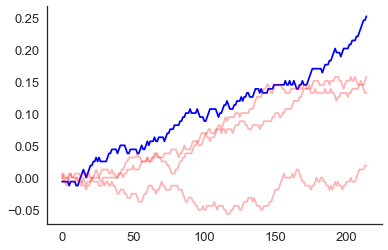

In [13]:
# This is a snippet from believer_skeptic.py, specifically the 
# simulate_multirace function.
single_process=0 
si=.1
tb=1.0
dt=.001
nresp = p['vd'].size
dx = si * np.sqrt(dt)
nTime = np.ceil((tb-p['tr'])/dt).astype(int)
xtb = believer_skeptic.temporal_dynamics(p, np.cumsum([dt]*nTime))

# Run the process model
Pd = .5 * (1 + (p['vd'] * np.sqrt(dt))/si)
Pi = .5 * (1 + (p['vi'] * np.sqrt(dt))/si)
direct = xtb * np.where((rs((nresp, nTime)).T < Pd),dx,-dx).T
indirect = np.where((rs((nresp, nTime)).T < Pi),dx,-dx).T
execution = np.cumsum(direct-indirect, axis=1)

act_ix, rt, rt_ix = believer_skeptic.analyze_multiresponse(execution, p)    

nsteps_to_rt = np.argmax((execution.T>=p['a']).T, axis=1)
rts = p['tr'] + nsteps_to_rt*dt

# set non responses to 999
rts[rts==p['tr']]=999

# get accumulator with fastest RT (winner) in each cond
act_ix = np.argmin(rts)
winner, rt=act_ix, rts[act_ix]
rt_ix = np.ceil((rt-p['tr'])/dt).astype(int)
actions = np.arange(nresp)
losers = actions[actions!=act_ix]
print(act_ix)
plt.plot(execution[act_ix][:rt_ix], color='b')
for l in losers:
    plt.plot(execution[l][:rt_ix], color='r', alpha=.3)
sns.despine()